### Breast cancer

We create the classification of breast cancer `stages` and train the model using the KNN algorithm.  
The best perfomance is in the middle, using six `neighbours`.  

Featre names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Data:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 

Shape: (569

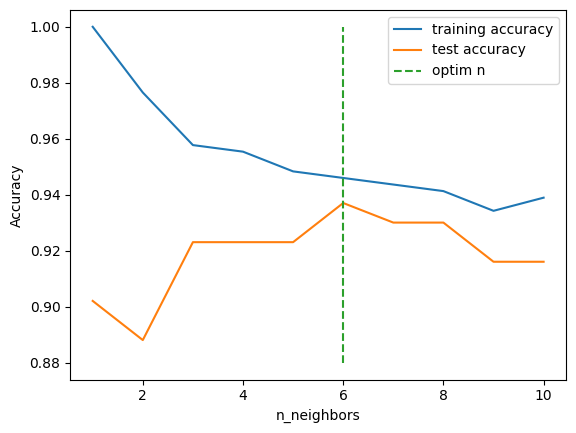

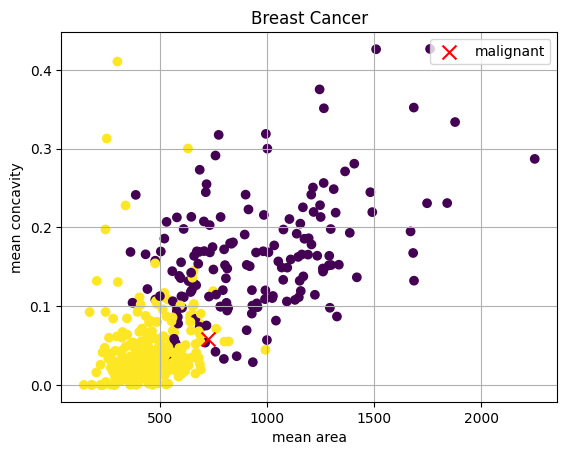

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Dataset
dataset = load_breast_cancer()

# Training and test data
X1, X2, y1, y2 = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, random_state=66)


# Evaluate accuracy for different numbers of n_neighbors
accuracy1 = []
accuracy2 = []
neighbors = range(1, 11)
for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X1, y1)
    accuracy1.append(clf.score(X1, y1))
    accuracy2.append(clf.score(X2, y2))

# Optim n_neighbors
k, max_accuracy = max(enumerate(accuracy2), key=lambda z: z[1])
optim_n = neighbors[k]

# Predict unknown
model = KNeighborsClassifier(n_neighbors=optim_n)
model.fit(X1, y1)
X_unknown = X2[15]
y_unknown = model.predict(X_unknown.reshape(1, -1))
y_target = dataset['target_names'][y_unknown]


print("Featre names:\n", dataset['feature_names'], '\n')
print("Data:\n", dataset['data'], '\n')
print("Shape:", dataset['data'].shape)
print("Optim (k, max_accuracy):", f"k={k}, max_accuracy={max_accuracy}")
print("Optim n_neighbours:", n, '\n')
print("X_unknown:\n", X_unknown)
print("y_unknown:", y_unknown)
print("Predicted target:", y_target)


# Plot accuracy graph
plt.plot(neighbors, accuracy1, label="training accuracy")
plt.plot(neighbors, accuracy2, label="test accuracy")
plt.plot([optim_n, optim_n], [0.88, 1], linestyle='--', label="optim n")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Plot mean scatter plot
fig, ax = plt.subplots()
ax.set_title("Breast Cancer")
ax.set_xlabel('mean area')
ax.set_ylabel('mean concavity')
df = pd.DataFrame(X1, columns=dataset.feature_names)
ax.scatter(df['mean area'], df['mean concavity'], c=y1)
ax.scatter(X_unknown[3], X_unknown[6], c='r',marker='x',s=100, label=y_target[0])
ax.grid()
plt.legend(loc='upper right')
plt.show()

### References

https://medium.com/analytics-vidhya/prediction-and-data-visualization-of-breast-cancer-using-k-nearest-neighbor-knn-classifier-df7adadc4872  